In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]
from matplotlib.ticker import MultipleLocator

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');

default_params   = {'ExternalObservableFile': 'Rvalues_200815.csv',
                    'ExternalObservableInfo': {'dateformat':'%d/%m/%Y'},
                    'resolve_US_states': True,
                    'FinalDate': '18/05/2020',
                    'FinalDateExtendWithShiftdays':True}


In [2]:
cv_cccsl     = cvc.CrossValidation(datasource = 'CCCSL',     **default_params)
cv_oxford    = cvc.CrossValidation(datasource = 'OXFORD',    **default_params)
cv_whophsm   = cvc.CrossValidation(datasource = 'WHOPHSM',   **default_params)
cv_acaps     = cvc.CrossValidation(datasource = 'ACAPS',     **default_params)
cv_coronanet = cvc.CrossValidation(datasource = 'CORONANET', **default_params)
cv_hitcovid  = cvc.CrossValidation(datasource = 'HITCOVID',  **default_params)

/home/lukas/projects/corona/programs/measureclass.py:381: UserWarning: Database "ACAPS" does not support US state resolution
  warnings.warn('Database "ACAPS" does not support US state resolution')


In [ ]:
# This takes a LONG time!

shiftdaylist = np.arange(8)+10
alphalist    = np.power(10,np.linspace(-4,-1,num=17))


for i in range(20):
    print('CCCSL')
    cv_cccsl.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('OXFORD')
    cv_oxford.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('WHOPHSM')
    cv_whophsm.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('ACAPS')
    cv_acaps.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('CORONANET')
    cv_coronanet.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)

    print('HITCOVID')
    cv_hitcovid.RunCV(shiftdaylist=shiftdaylist,alphalist = alphalist, crossvalcount = 10)



In [3]:
# ... rather load from external files

cv_cccsl     = pickle.load(open('pickle/cv_cccsl_200831.pickle','rb'))
cv_oxford    = pickle.load(open('pickle/cv_oxford_200831.pickle','rb'))
cv_whophsm   = pickle.load(open('pickle/cv_whophsm_200831.pickle','rb'))
cv_acaps     = pickle.load(open('pickle/cv_acaps_200831.pickle','rb'))
cv_coronanet = pickle.load(open('pickle/cv_coronanet_200831.pickle','rb'))
cv_hitcovid  = pickle.load(open('pickle/cv_hitcovid_200831.pickle','rb'))


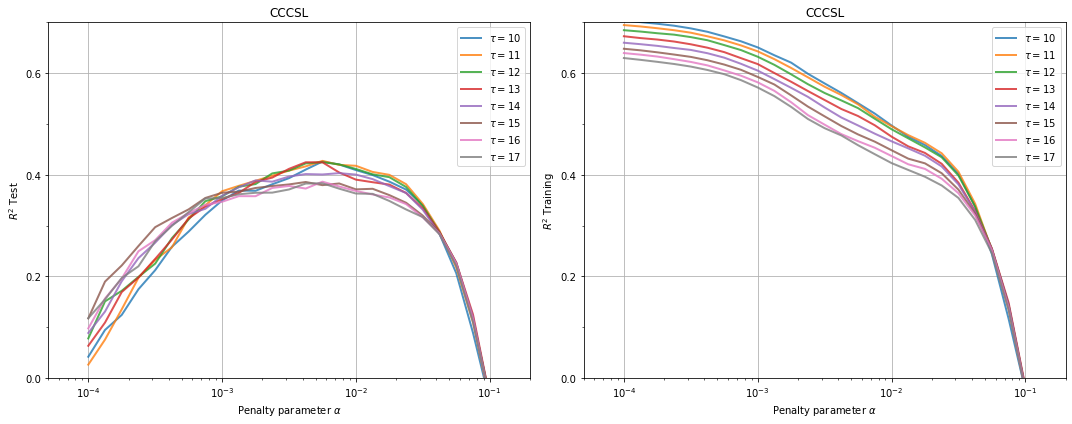

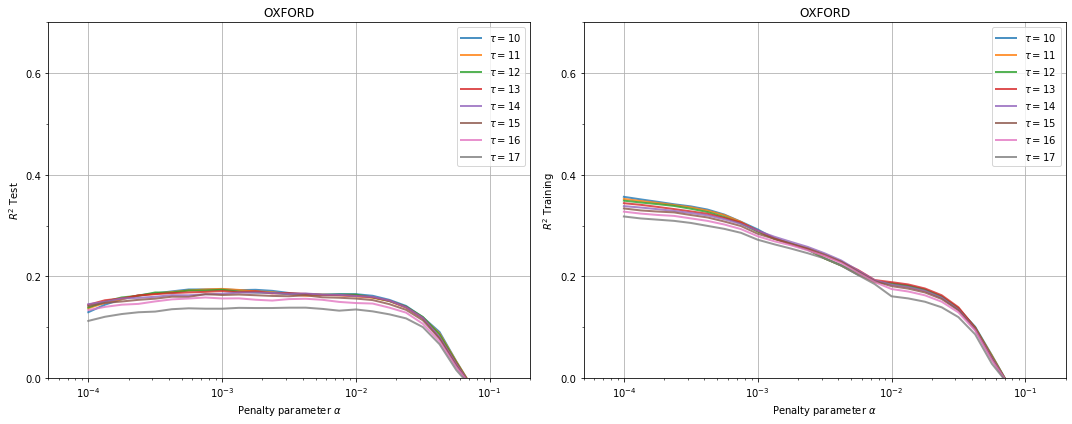

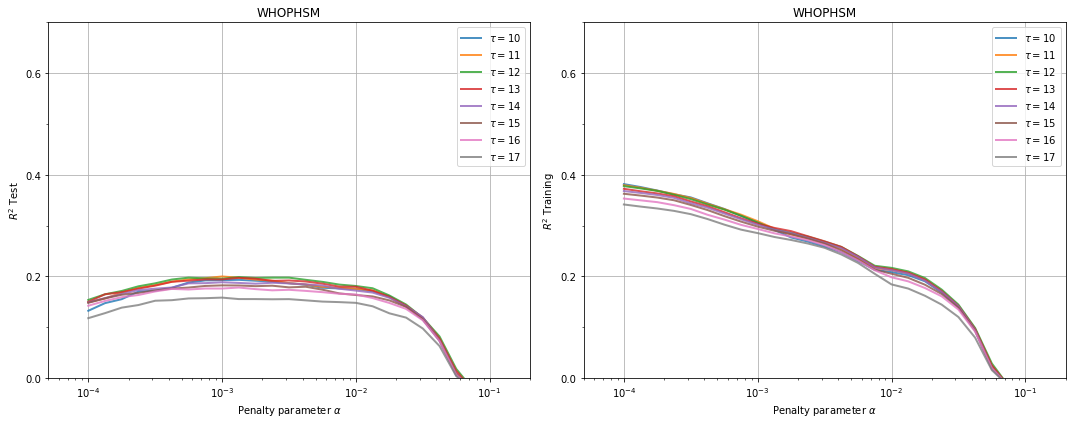

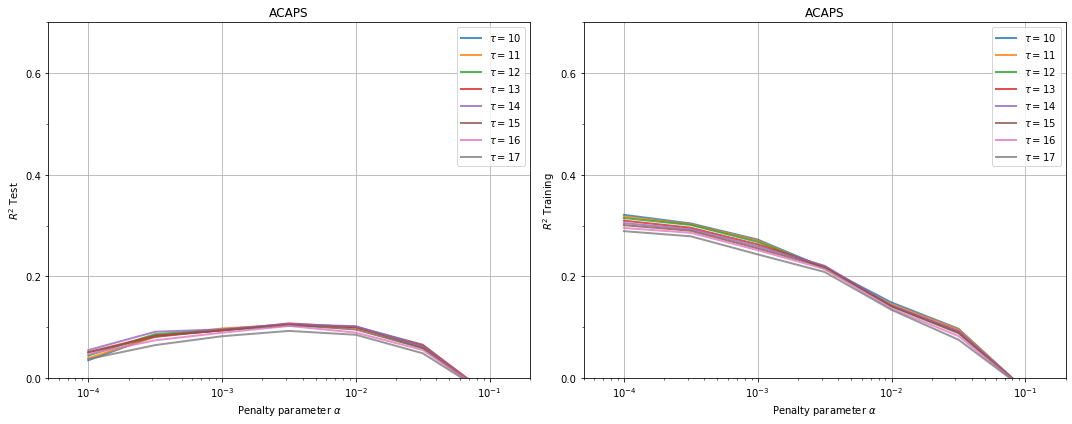

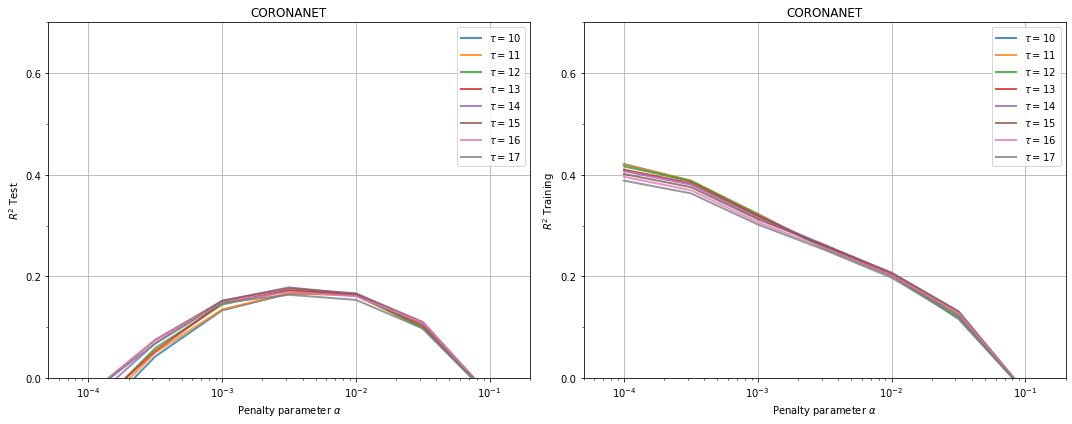

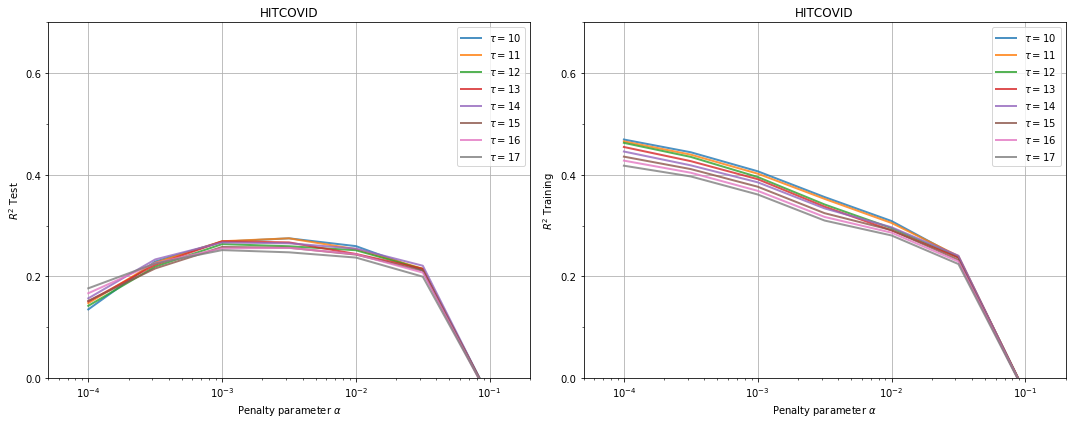

In [4]:
cv_cccsl.PlotCVresults    (title = 'CCCSL',     ylim = (0,.7), filename = 'lasso_crossvalidation_cccsl_200831.pdf',     xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_oxford.PlotCVresults   (title = 'OXFORD',    ylim = (0,.7), filename = 'lasso_crossvalidation_oxford_200831.pdf',    xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_whophsm.PlotCVresults  (title = 'WHOPHSM',   ylim = (0,.7), filename = 'lasso_crossvalidation_whophsm_200831.pdf',   xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_acaps.PlotCVresults    (title = 'ACAPS',     ylim = (0,.7), filename = 'lasso_crossvalidation_acaps_200831.pdf',     xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_coronanet.PlotCVresults(title = 'CORONANET', ylim = (0,.7), filename = 'lasso_crossvalidation_coronanet_200831.pdf', xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)
cv_hitcovid.PlotCVresults (title = 'HITCOVID',  ylim = (0,.7), filename = 'lasso_crossvalidation_hitcovid_200831.pdf',  xlim = (1e-4/2,2e-1), ytics = .2, mytics =.1)


In [5]:
print('\nCCCSL\n',cv_cccsl.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nOXFORD\n',cv_oxford.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nWHOPHSM\n',cv_whophsm.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nACAPS\n',cv_acaps.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nCORONANET\n',cv_coronanet.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))
print('\nHITCOVID\n',cv_hitcovid.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending=False).head(10))



CCCSL
     shiftdays     alpha  R2 Test Weighted  R2 Test Avgd
45         11  0.005623          0.427417      0.421054
20         10  0.005623          0.426094      0.412925
70         12  0.005623          0.424836      0.418101
92         13  0.004217          0.424682      0.415904
95         13  0.005623          0.424591      0.410276
67         12  0.004217          0.422431      0.414038
73         12  0.007499          0.420541      0.413472
23         10  0.007499          0.420313      0.409134
48         11  0.007499          0.419495      0.413676
26         11  0.010000          0.417759      0.411833

OXFORD
     shiftdays     alpha  R2 Test Weighted  R2 Test Avgd
27         11  0.001000          0.175413      0.200131
2          10  0.001000          0.174728      0.198362
49         11  0.000750          0.174349      0.202647
24         10  0.000750          0.174337      0.205048
21         10  0.000562          0.174239      0.194628
52         12  0.001000        

In [6]:
cv_cccsl.ComputeFinalModels(modelparameters=[(11,0.005623)])
cv_oxford.ComputeFinalModels(modelparameters=[(11,0.001000)])
cv_whophsm.ComputeFinalModels(modelparameters=[(11,0.001000)])
cv_acaps.ComputeFinalModels(modelparameters=[(13,0.003162)])
cv_coronanet.ComputeFinalModels(modelparameters=[(14,0.003162)])
cv_hitcovid.ComputeFinalModels(modelparameters=[(10,0.003162)])

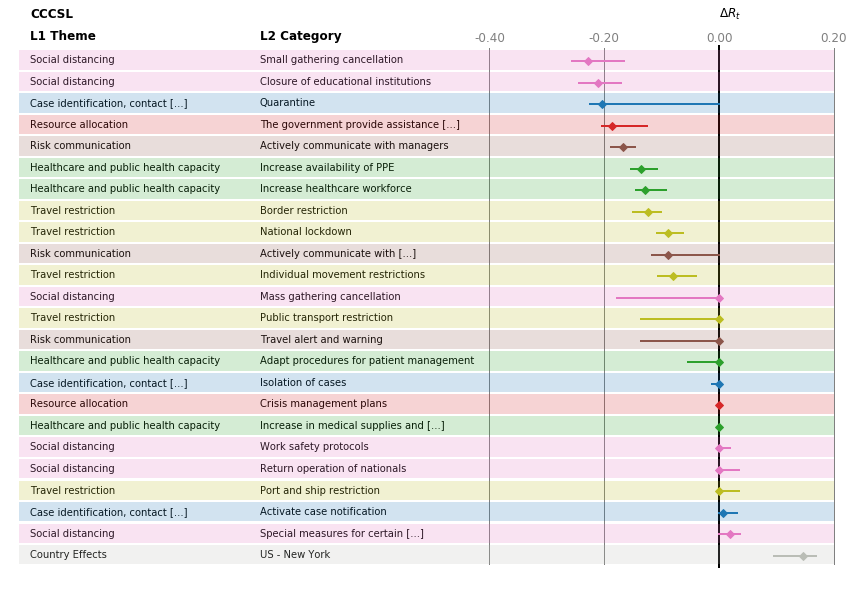

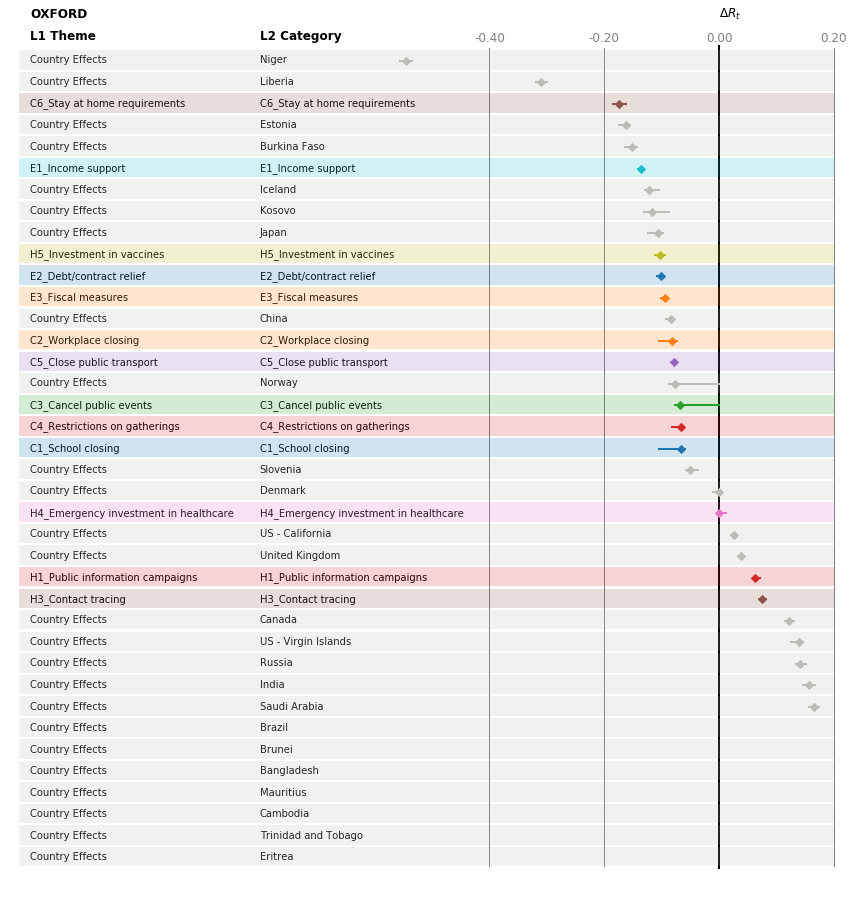

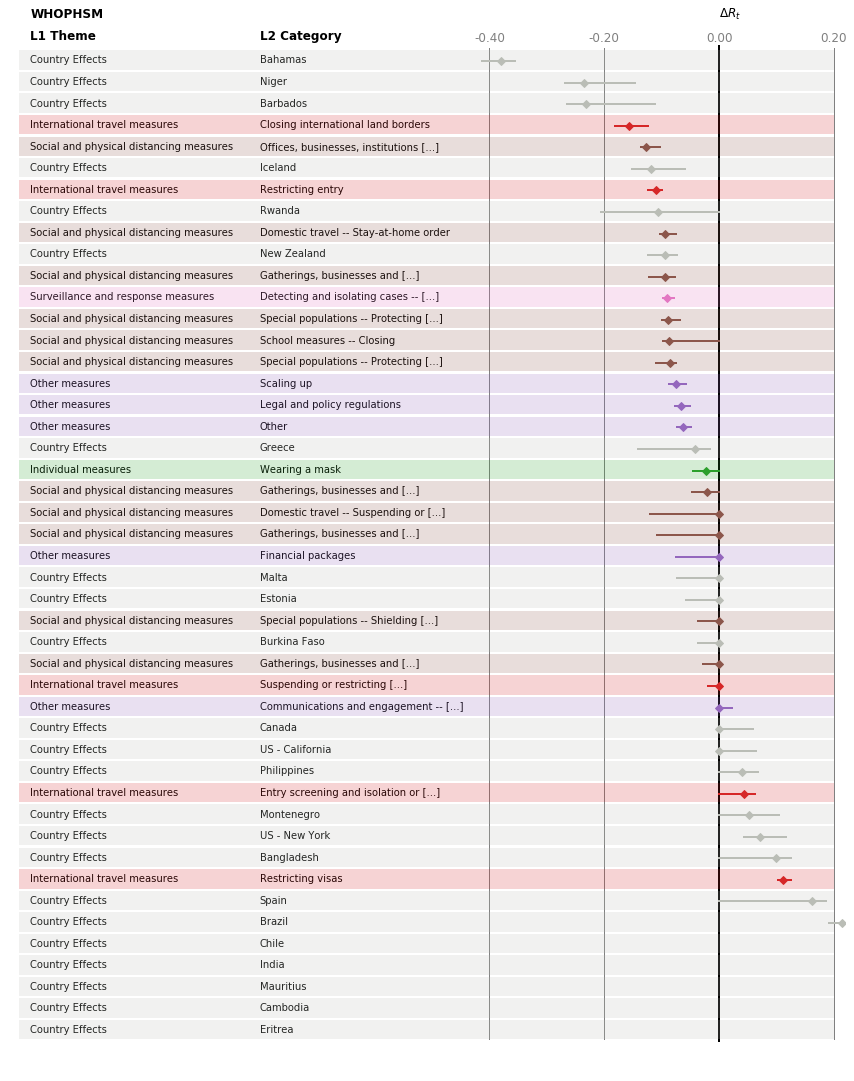

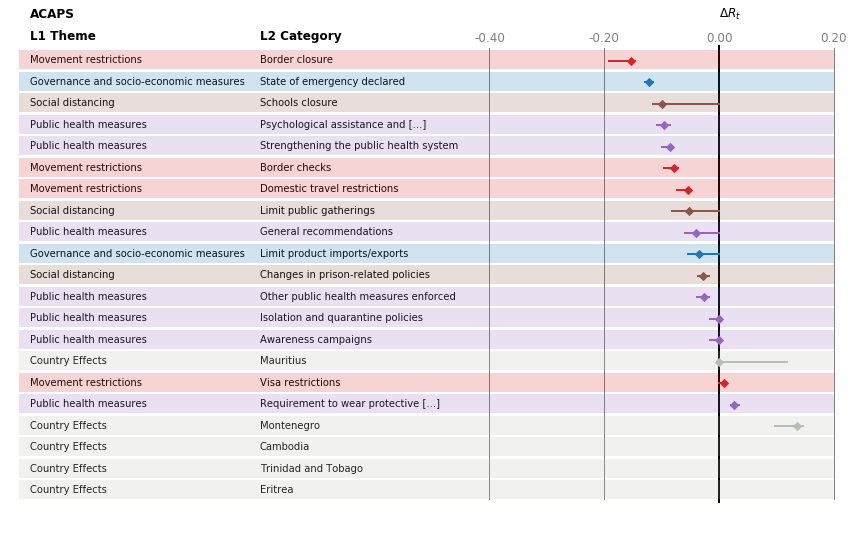

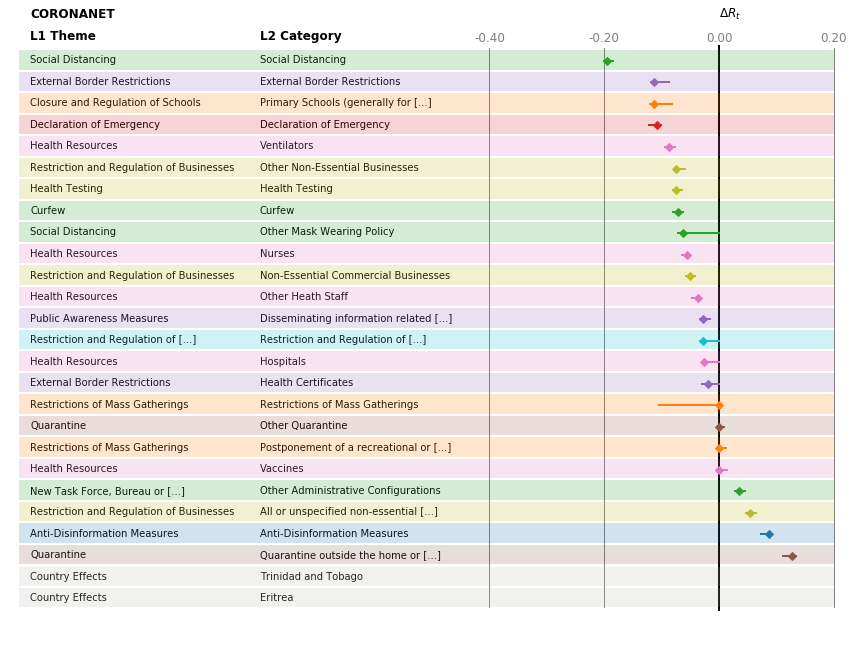

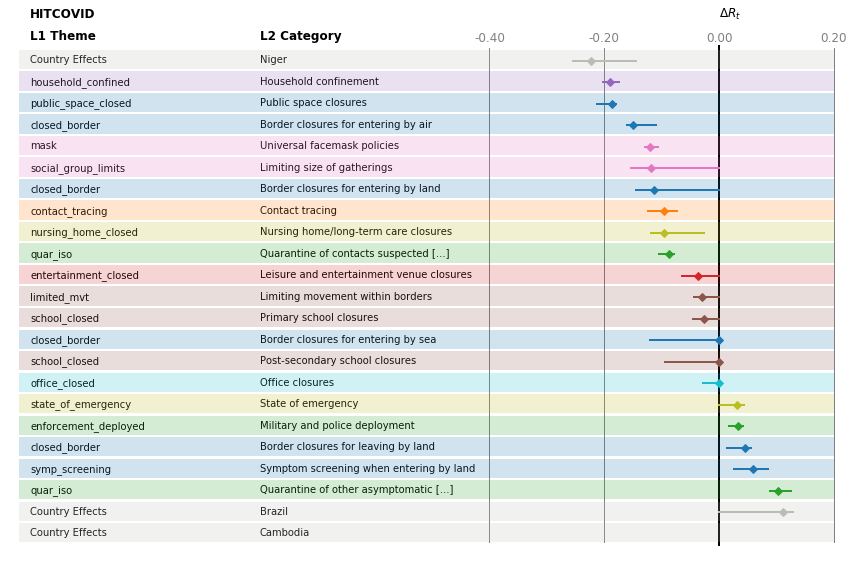

In [7]:
cv_cccsl.PlotMeasureListSorted    (title = 'CCCSL',     drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_cccsl_200831.pdf',     graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_oxford.PlotMeasureListSorted   (title = 'OXFORD',    drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_oxford_200831.pdf',    graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_whophsm.PlotMeasureListSorted  (title = 'WHOPHSM',   drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_whophsm_200831.pdf',   graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_acaps.PlotMeasureListSorted    (title = 'ACAPS',     drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_acaps_200831.pdf',     graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_coronanet.PlotMeasureListSorted(title = 'CORONANET', drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_coronanet_200831.pdf', graylines = [-40,-20,20], include_countries = True, figsize = (12,3))
cv_hitcovid.PlotMeasureListSorted (title = 'HITCOVID',  drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_hitcovid_200831.pdf',  graylines = [-40,-20,20], include_countries = True, figsize = (12,3))


In [8]:
cv_cccsl.FinalMeasureEffects    (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_cccsl_200831.csv')
cv_oxford.FinalMeasureEffects   (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_oxford_200831.csv')
cv_whophsm.FinalMeasureEffects  (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_whophsm_200831.csv')
cv_acaps.FinalMeasureEffects    (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_acaps_200831.csv')
cv_coronanet.FinalMeasureEffects(additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_coronanet_200831.csv')
cv_hitcovid.FinalMeasureEffects (additional_columns = ['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measureeffects_hitcovid_200831.csv')


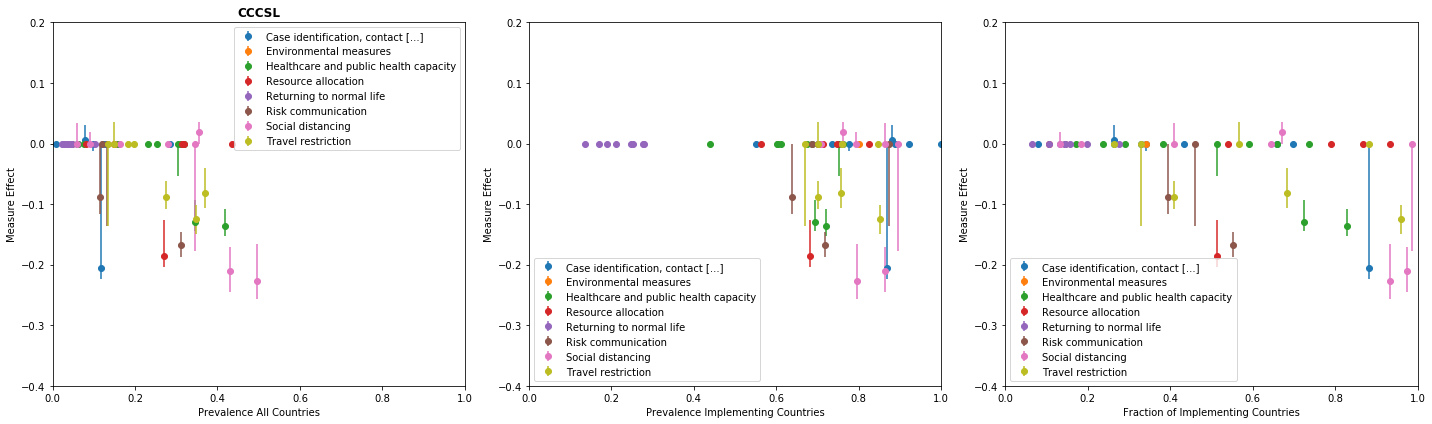

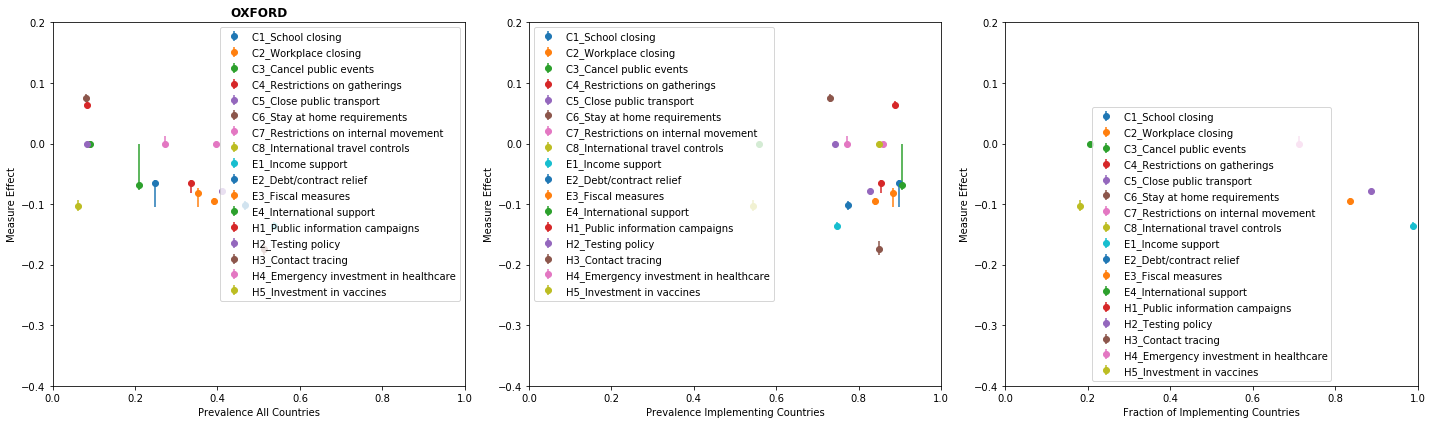

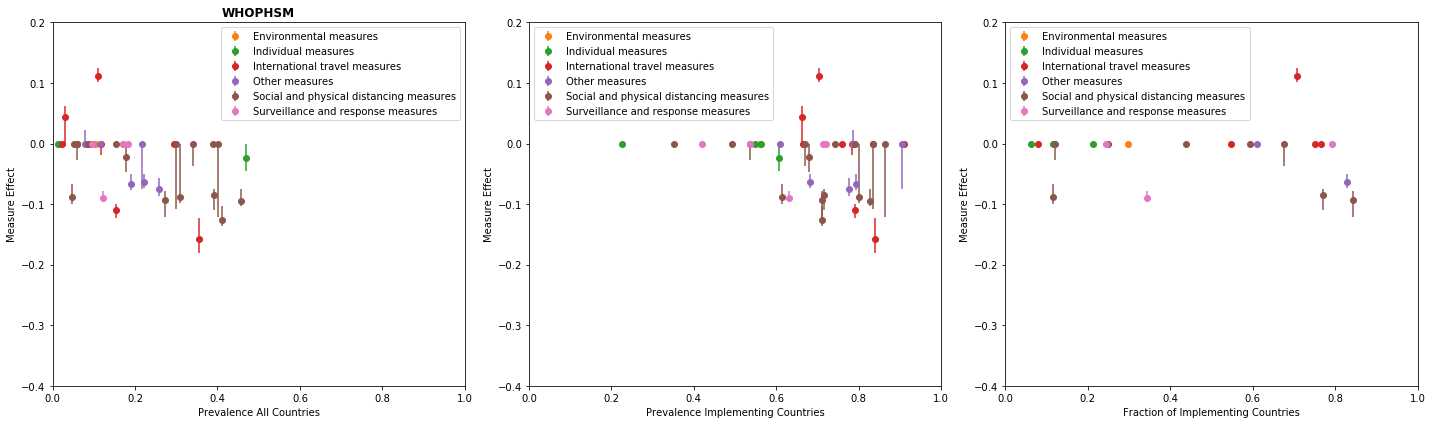

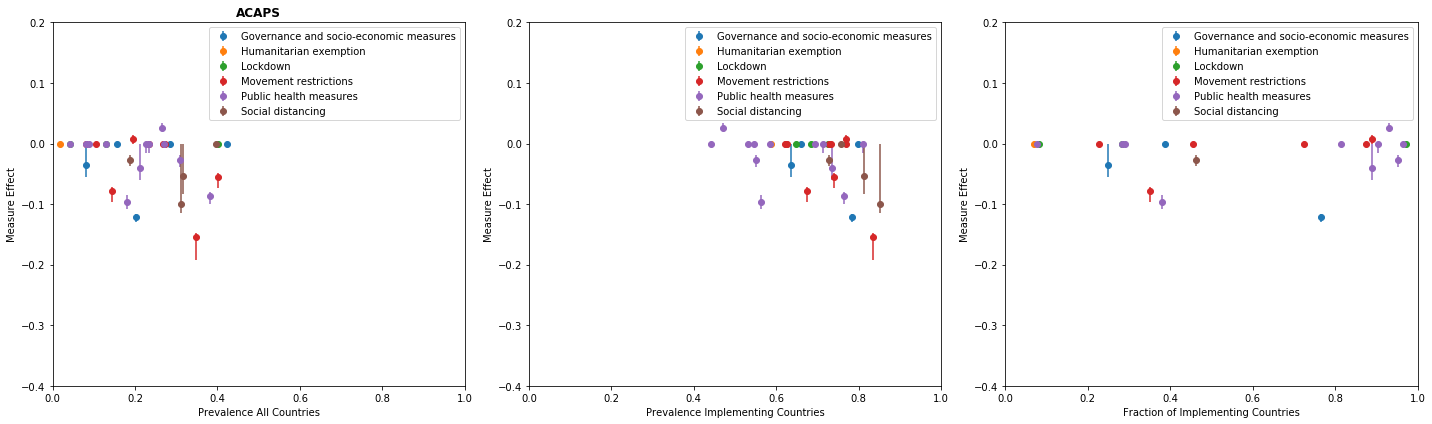

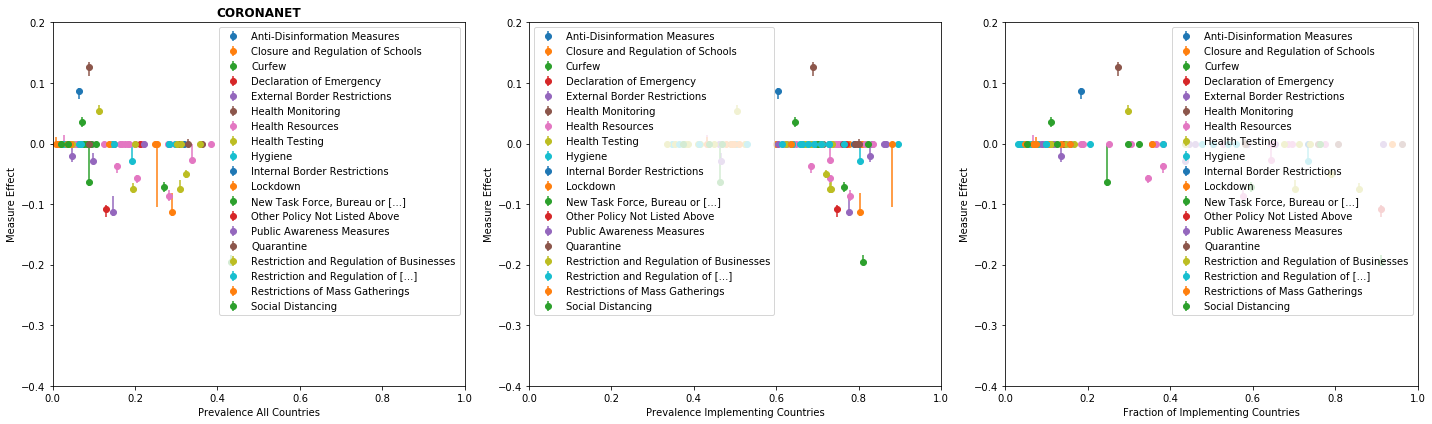

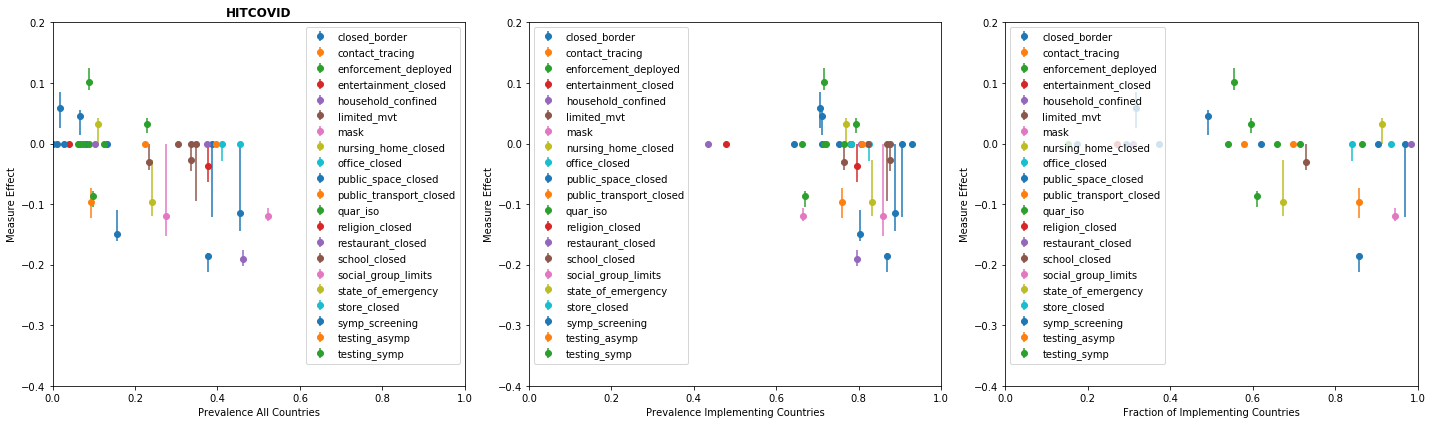

In [9]:
cv_cccsl.PlotPrevalenceEffects    (title = 'CCCSL',     ylim = (-.4,.2), filename = 'prevalenceeffects_cccsl_200831.pdf')
cv_oxford.PlotPrevalenceEffects   (title = 'OXFORD',    ylim = (-.4,.2), filename = 'prevalenceeffects_oxford_200831.pdf')
cv_whophsm.PlotPrevalenceEffects  (title = 'WHOPHSM',   ylim = (-.4,.2), filename = 'prevalenceeffects_whophsm_200831.pdf')
cv_acaps.PlotPrevalenceEffects    (title = 'ACAPS',     ylim = (-.4,.2), filename = 'prevalenceeffects_acaps_200831.pdf')
cv_coronanet.PlotPrevalenceEffects(title = 'CORONANET', ylim = (-.4,.2), filename = 'prevalenceeffects_coronanet_200831.pdf')
cv_hitcovid.PlotPrevalenceEffects (title = 'HITCOVID',  ylim = (-.4,.2), filename = 'prevalenceeffects_hitcovid_200831.pdf')


In [10]:
pickle.dump(cv_cccsl,open('pickle/cv_cccsl_200831_inclFinal.pickle','wb'))
pickle.dump(cv_oxford,open('pickle/cv_oxford_200831_inclFinal.pickle','wb'))
pickle.dump(cv_whophsm,open('pickle/cv_whophsm_200831_inclFinal.pickle','wb'))
pickle.dump(cv_acaps,open('pickle/cv_acaps_200831_inclFinal.pickle','wb'))
pickle.dump(cv_coronanet,open('pickle/cv_coronanet_200831_inclFinal.pickle','wb'))
pickle.dump(cv_hitcovid,open('pickle/cv_hitcovid_200831_inclFinal.pickle','wb'))

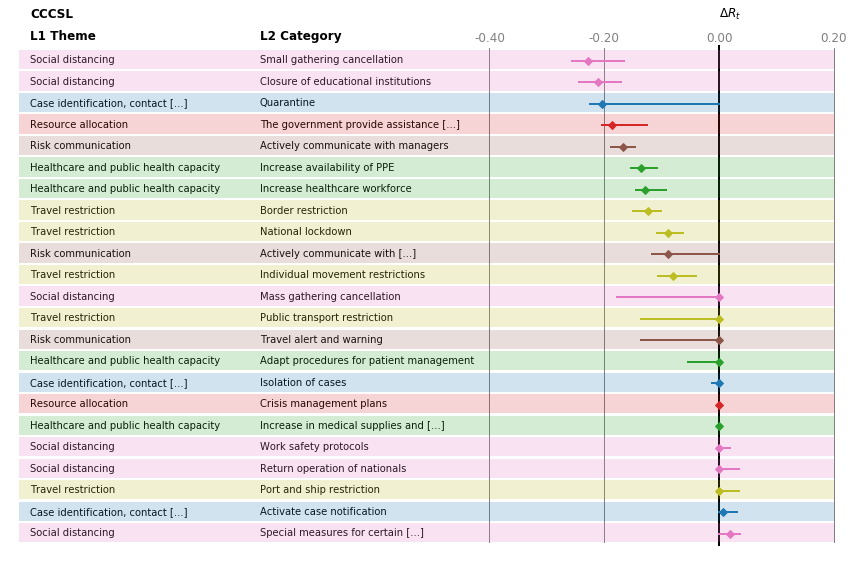

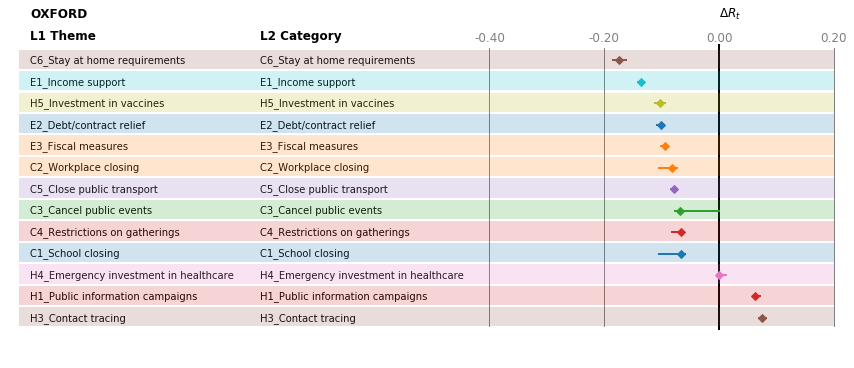

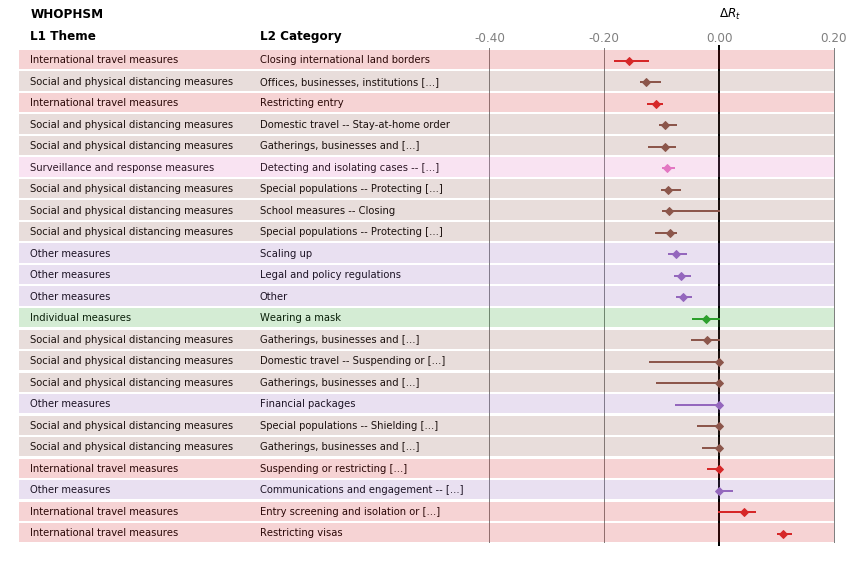

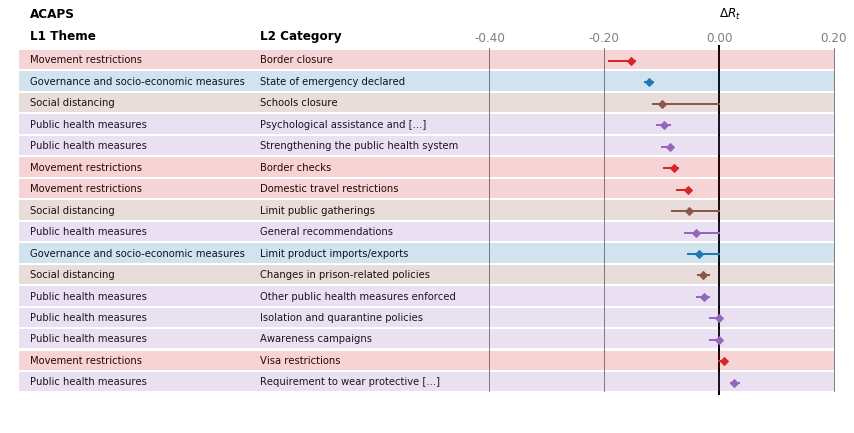

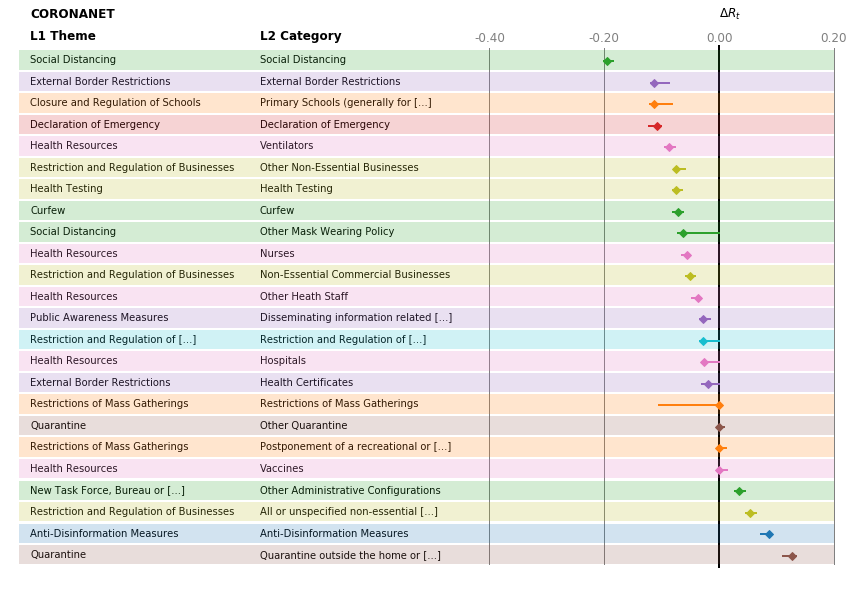

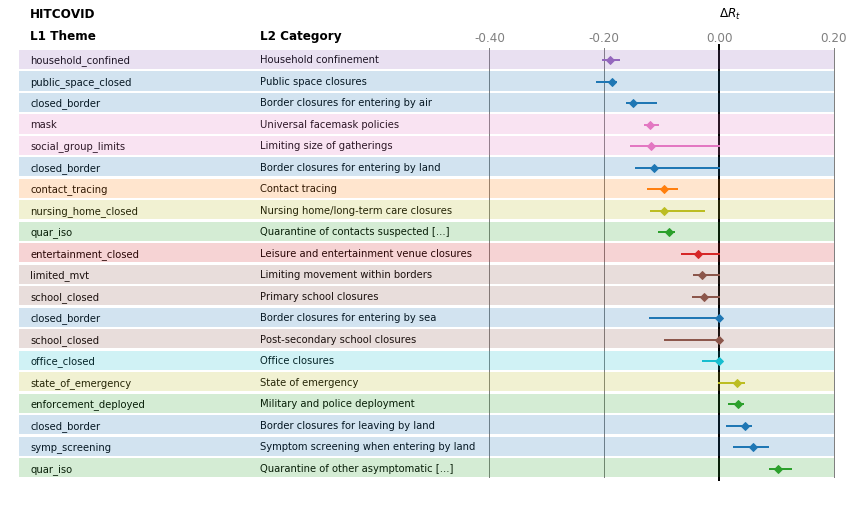

In [11]:
cv_cccsl.PlotMeasureListSorted    (title = 'CCCSL',     drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_cccsl_200831_noCE.pdf',     graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_oxford.PlotMeasureListSorted   (title = 'OXFORD',    drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_oxford_200831_noCE.pdf',    graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_whophsm.PlotMeasureListSorted  (title = 'WHOPHSM',   drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_whophsm_200831_noCE.pdf',   graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_acaps.PlotMeasureListSorted    (title = 'ACAPS',     drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_acaps_200831_noCE.pdf',     graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_coronanet.PlotMeasureListSorted(title = 'CORONANET', drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_coronanet_200831_noCE.pdf', graylines = [-40,-20,20], include_countries = False, figsize = (12,3))
cv_hitcovid.PlotMeasureListSorted (title = 'HITCOVID',  drop_zeros = True, entryheight = .3, rescale = False, filename='measurelist_hitcovid_200831_noCE.pdf',  graylines = [-40,-20,20], include_countries = False, figsize = (12,3))


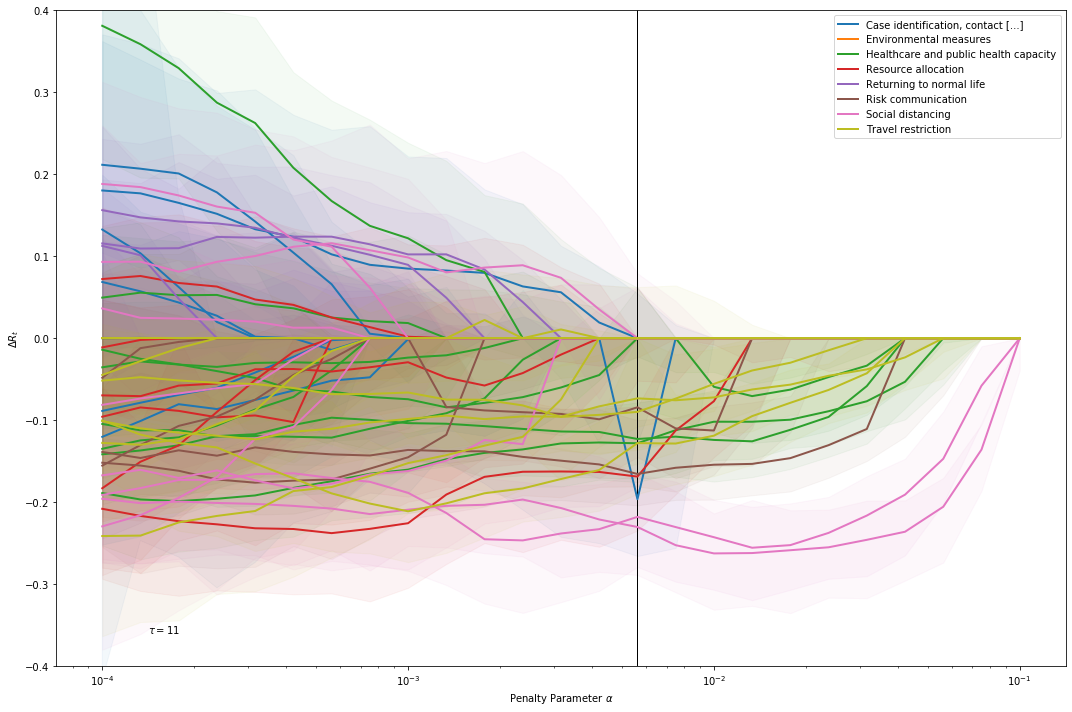

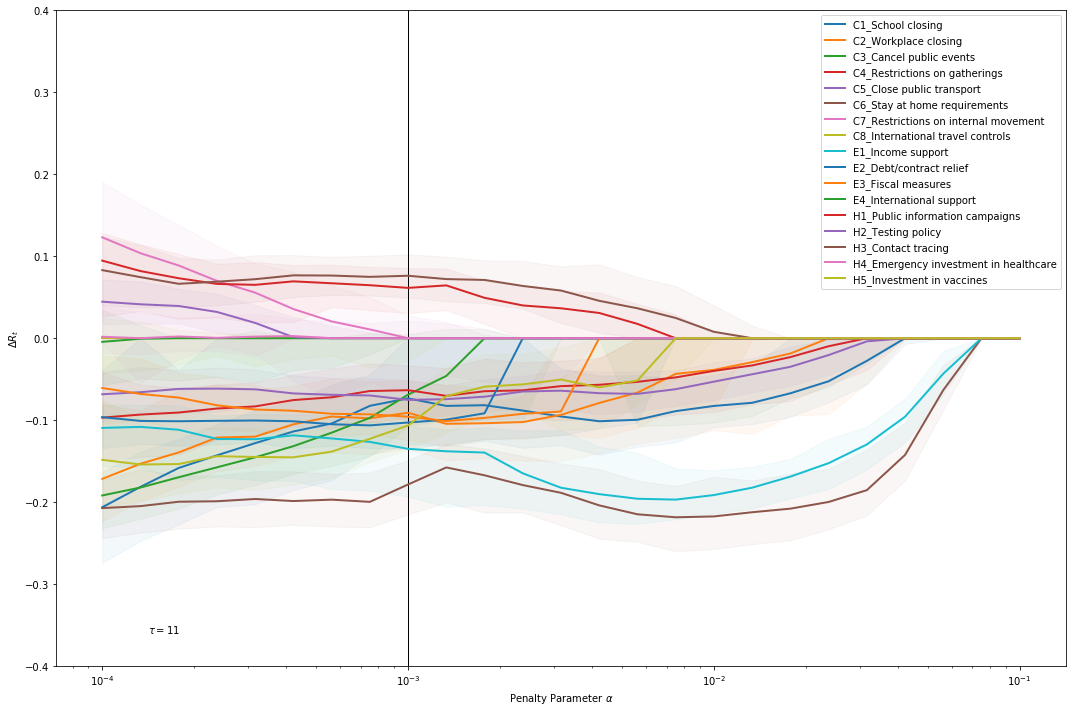

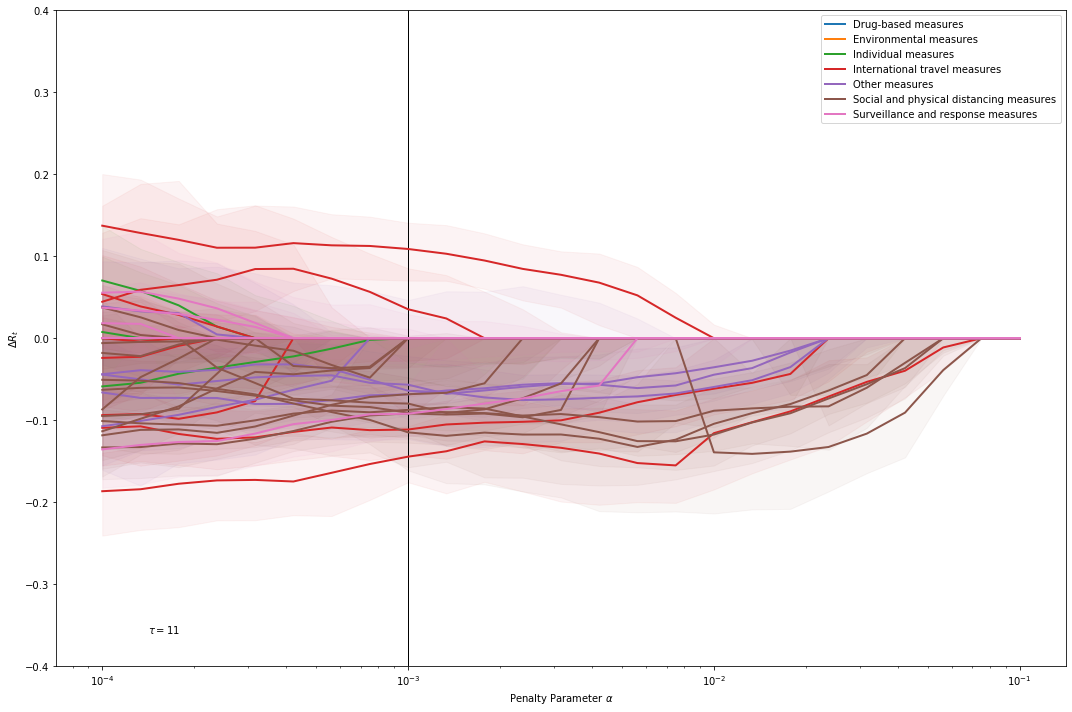

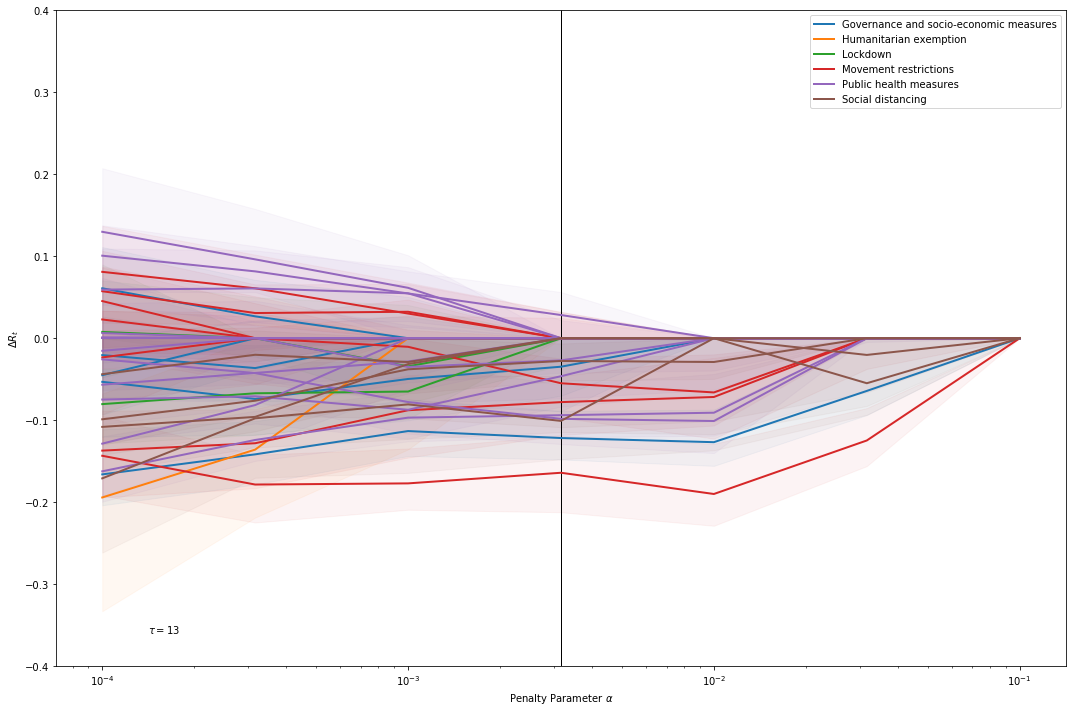

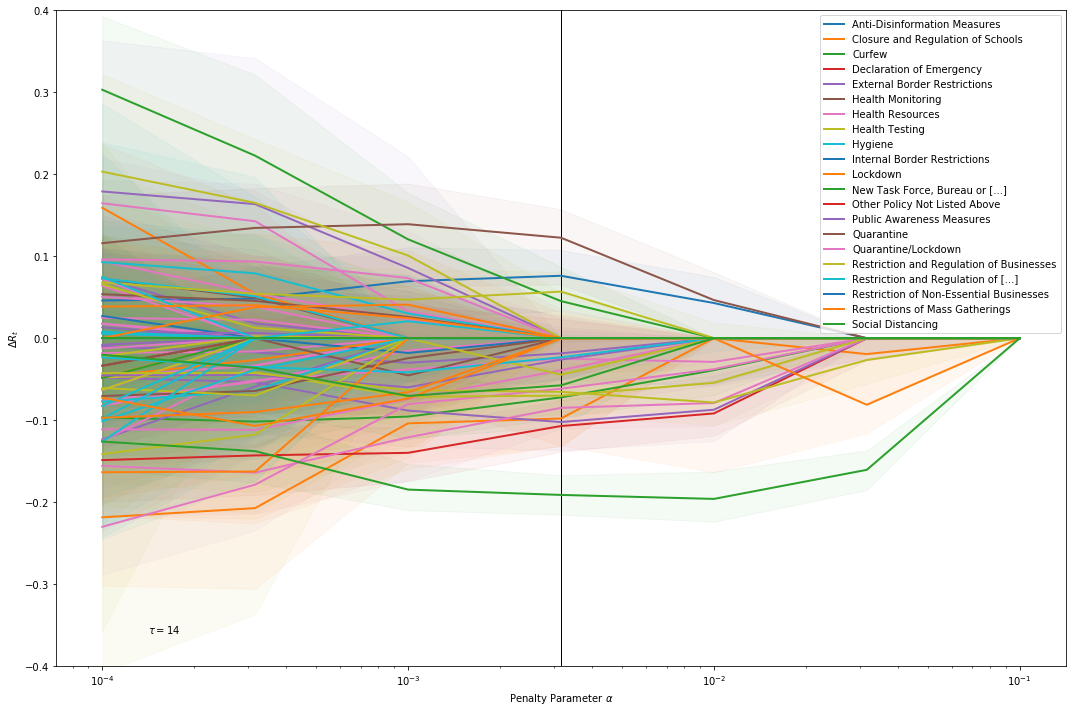

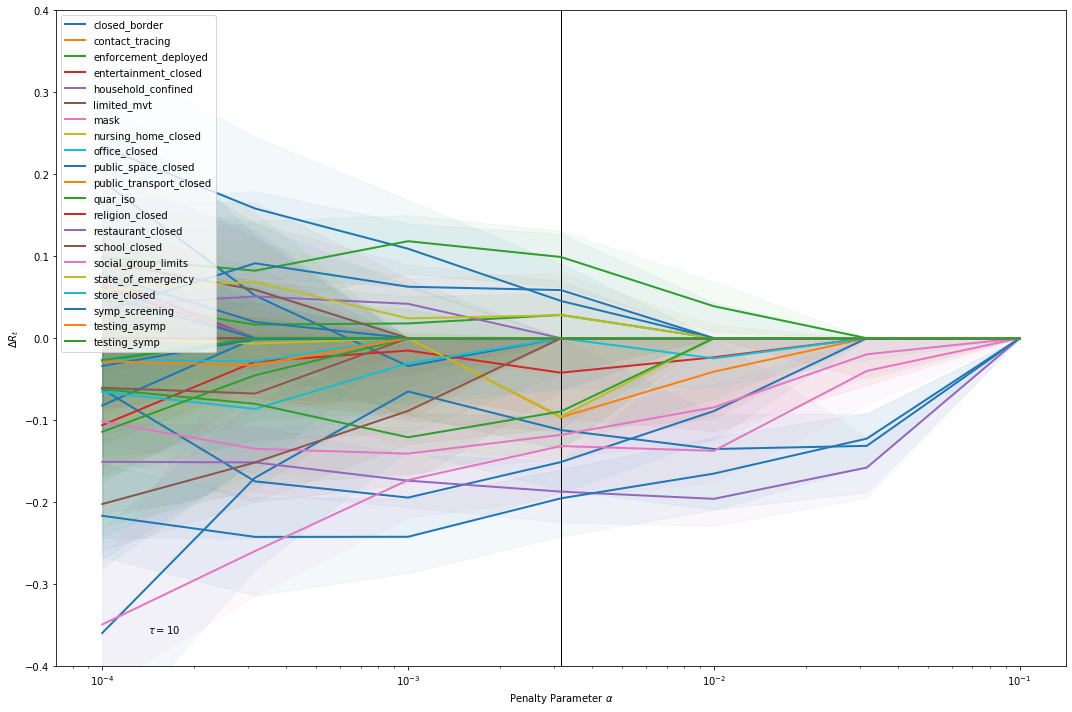

In [15]:
cv_cccsl.PlotCVAlphaSweep    (shiftdays=11, highlight_alpha=0.005623, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_cccsl_200831.pdf')
cv_oxford.PlotCVAlphaSweep   (shiftdays=11, highlight_alpha=0.001000, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_oxford_200831.pdf')
cv_whophsm.PlotCVAlphaSweep  (shiftdays=11, highlight_alpha=0.001000, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_whophsm_200831.pdf')
cv_acaps.PlotCVAlphaSweep    (shiftdays=13, highlight_alpha=0.003162, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_acaps_200831.pdf')
cv_coronanet.PlotCVAlphaSweep(shiftdays=14, highlight_alpha=0.003162, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_coronanet_200831.pdf')
cv_hitcovid.PlotCVAlphaSweep (shiftdays=10, highlight_alpha=0.003162, rescale = False, ylim = (-.4,.4), filename = 'alphasweep_hitcovid_200831.pdf')


In [ ]:
cv_cccsl = pickle.load(open('pickle/cv_cccsl_200817.pickle','rb'))
cv_oxford = pickle.load(open('pickle/cv_oxford_200817.pickle','rb'))
cv_whophsm = pickle.load(open('pickle/cv_whophsm_200817.pickle','rb'))
cv_acaps = pickle.load(open('pickle/cv_acaps_200817.pickle','rb'))
cv_coronanet = pickle.load(open('pickle/cv_coronanet_200817.pickle','rb'))
cv_hitcovid = pickle.load(open('pickle/cv_hitcovid_200817.pickle','rb'))


In [ ]:
# additional statistical tests

crossval_removeAmer = cvc.CrossValidation(**default_params, RemoveContinent = 'Americas')
crossval_removeAsia = cvc.CrossValidation(**default_params, RemoveContinent = 'Asia')
crossval_removeEuro = cvc.CrossValidation(**default_params, RemoveContinent = 'Europe')


In [ ]:
crossval_removeAmer.ComputeFinalModels(modelparameters=[(13,1e-2)])
crossval_removeAsia.ComputeFinalModels(modelparameters=[(13,1e-2)])
crossval_removeEuro.ComputeFinalModels(modelparameters=[(13,1e-2)])


In [ ]:
crossval_removeAmer.PlotMeasureListSorted(drop_zeros=True, entryheight=.4, rescale = False, title = 'Remove Americas', graylines = [-60,-40,-20,20], textbreak = 35)
crossval_removeAsia.PlotMeasureListSorted(drop_zeros=True, entryheight=.4, rescale = False, title = 'Remove Asia',     graylines = [-60,-40,-20,20], textbreak = 35)
crossval_removeEuro.PlotMeasureListSorted(drop_zeros=True, entryheight=.4, rescale = False, title = 'Remove Europe',   graylines = [-60,-40,-20,20], textbreak = 35)


In [ ]:
crossval_removeAmer.FinalMeasureEffects(additional_columns=['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measurelist_200618_removeAmer.csv')
crossval_removeAsia.FinalMeasureEffects(additional_columns=['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measurelist_200618_removeAsia.csv')
crossval_removeEuro.FinalMeasureEffects(additional_columns=['mean','std'], rescale = False).sort_values(['Measure_L1','Measure_L2']).to_csv('measurelist_200618_removeEuro.csv')

In [ ]:
# reset CV data
crossval.CVresults = None

# run CV for additional plot
#crossval.RunCV(shiftdaylist = np.arange(22), alphalist = [10**-2.2])

# takes a long time, load from external file
crossval.LoadCVResults('cv_200618_shiftdays.csv')

In [ ]:
def lasso_median(x):
    return x.quantile(.5)
def lasso_low95(x):
    return x.quantile(.025)
def lasso_high95(x):
    return x.quantile(.975)

measurelist = ['IncreaseAvailabilityOfPpe', 'IncreaseHealthcareWorkforce',
               'ReduceTheBurdenOnHealthSystem','ActivelyCommunicateWithStakeholders', 
               'ClosureOfEducationalInstitutions', 'SmallGatheringCancellation',
               'BorderRestriction'
              ]


measureeffects = crossval.CVresults[['shiftdays'] + measurelist].groupby(by = 'shiftdays').agg([lasso_median,lasso_low95,lasso_high95])
measureeffects.T.to_csv('measureeffects_over_shiftdays_200616.csv')
colornames       = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]

fig,ax = plt.subplots(1,1,figsize = (15,8))

for i,measure in enumerate(measurelist):
    ax.plot(measureeffects[(measure,'lasso_median')],label = measure, c = colornames[i], lw = 2, marker = 'o')
    ax.fill_between(measureeffects.index, measureeffects[(measure,'lasso_low95')],measureeffects[(measure,'lasso_high95')], color = colornames[i], alpha = .3 )
ax.set_ylim([-.4,.07])
ax.set_xlim([0,21])
ax.vlines(13,-.4,.1, color = '#555753',lw=5)
ax.legend()
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.set_xlabel('Time-Delay for Onset of Measure Effects')
ax.set_ylabel(r'$\Delta\; R(t)$')
ax.annotate('Optimal Parameters',(12.75,.02),rotation=90,va='center',c='#555753')
fig.tight_layout()
fig.savefig('measureeffects_over_shiftdays.pdf')

In [ ]:
specialcountries = ['US - California', 'US - New York', 'United Kingdom', 'Germany', 'Italy']

crossval.FinalTrajectories(countrylist = specialcountries).T.to_csv('trajectories_200618.csv')

In [ ]:
externaldatafile = pd.read_csv('COVID19_data_PAPER_VERSION.csv',sep=';')

for country in specialcountries:
    print(country)
    print(externaldatafile[externaldatafile['Country'] == country][['Date','R','Confirmed']].dropna().head())
    print()